# Drawing Charts

This notebook presents various options for drawing charts of data, to complement the Week 3 chart types video.

This tutorial uses concepts from both the [Selection](Selection.ipynb) and [Reshaping](Reshaping.ipynb) notebooks.

This notebook uses the “MovieLens + IMDB/RottenTomatoes” data from the [HETREC data](https://grouplens.org/datasets/hetrec-2011/).  It also uses data sets built in to Seaborn.

## Setup

First we will import our modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Then import the HETREC MovieLens data.  A few notes:

- Tab-separated data
- Not UTF-8 - latin-1 encoding seems to work
- Missing data encoded as `\N` (there's a good chance that what we have is a PostgreSQL data dump!)

### Movies

In [2]:
movies = pd.read_csv('hetrec2011-ml/movies.dat', delimiter='\t', encoding='latin1', na_values=['\\N'])
movies.head()

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,...,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,...,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,...,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,...,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,...,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10197 non-null  int64  
 1   title                   10197 non-null  object 
 2   imdbID                  10197 non-null  int64  
 3   spanishTitle            10197 non-null  object 
 4   imdbPictureURL          10016 non-null  object 
 5   year                    10197 non-null  int64  
 6   rtID                    9886 non-null   object 
 7   rtAllCriticsRating      9967 non-null   float64
 8   rtAllCriticsNumReviews  9967 non-null   float64
 9   rtAllCriticsNumFresh    9967 non-null   float64
 10  rtAllCriticsNumRotten   9967 non-null   float64
 11  rtAllCriticsScore       9967 non-null   float64
 12  rtTopCriticsRating      9967 non-null   float64
 13  rtTopCriticsNumReviews  9967 non-null   float64
 14  rtTopCriticsNumFresh    9967 non-null 

It's useful to index movies by ID, so let's just do that now.

In [4]:
movies = movies.set_index('id')

### Movie Info

In [5]:
movie_genres = pd.read_csv('hetrec2011-ml/movie_genres.dat', delimiter='\t', encoding='latin1')
movie_genres.head()

,movieID,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [6]:
movie_tags = pd.read_csv('hetrec2011-ml/movie_tags.dat', delimiter='\t', encoding='latin1')
movie_tags.head()

,movieID,tagID,tagWeight
0,1,7,1
1,1,13,3
2,1,25,3
3,1,55,3
4,1,60,1


In [7]:
tags = pd.read_csv('hetrec2011-ml/tags.dat', delimiter='\t', encoding='latin1')
tags.head()

,id,value
0,1,earth
1,2,police
2,3,boxing
3,4,painter
4,5,whale


### Ratings

In [8]:
ratings = pd.read_csv('hetrec2011-ml/user_ratedmovies-timestamps.dat', delimiter='\t', encoding='latin1')
ratings.head()

,userID,movieID,rating,timestamp
0,75,3,1.0,1162160236000
1,75,32,4.5,1162160624000
2,75,110,4.0,1162161008000
3,75,160,2.0,1162160212000
4,75,163,4.0,1162160970000


We're going to compute movie statistics too:

In [9]:
movie_stats = ratings.groupby('movieID')['rating'].agg(['count', 'mean']).rename(columns={
    'mean': 'MeanRating',
    'count': 'RatingCount'
})
movie_stats.head()

,RatingCount,MeanRating
movieID,,
1,1263,3.735154
2,765,2.976471
3,252,2.873016
4,45,2.577778
5,225,2.753333


### Titanic data

We'll also use the Titanic data set from Seaborn:

In [10]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Bar Charts

**If we have:** a categorical variable and a numeric response variable  
**And we want:** to see how the mean of the numeric varies with the categorical  
**Then we can:** use Seaborn `catplot` to create a bar chart:

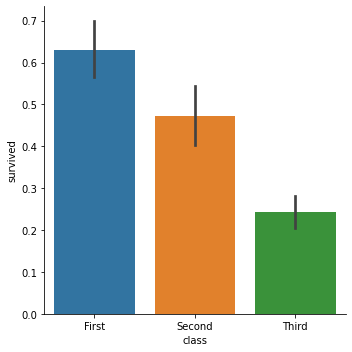

In [11]:
sns.catplot('class', 'survived', data=titanic, kind='bar')

There are quite a few things going on here:

* `catplot` by default computes the mean and 95% bootstrapped confidence intervals.
* If we have a 0/1 variable or a logical, such as `survived`, taking its mean is the same as counting the proportion that are `1` or `True`; this is also the same as computing the *probability* of a true value.  **This is a very useful trick.**
* Most (but not all) Seaborn plotting functions natively work with data frames; we give column names for the `x` and `y` axes, respectively, and provide the data frame as `data=`, and it plots.
* The bars are different colors for no reason. This is annoying.

We can fix that last problem:

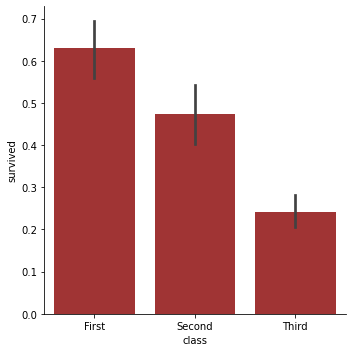

In [12]:
sns.catplot('class', 'survived', data=titanic, kind='bar', color='firebrick')

But we can also go further.

**If we have:** two categorical variables and a numeric response variable  
**And we want:** to see how the mean of the numeric varies with the combination of categorical variables  
**Then we can:** use Seaborn `catplot` to create a bar chart with color-coded bars by mapping a variable to `hue`:

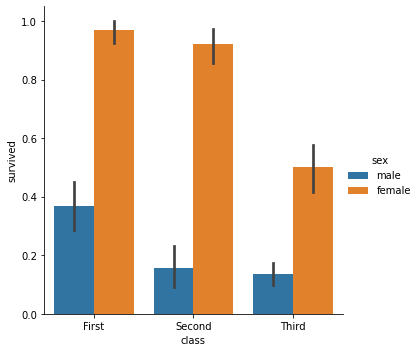

In [13]:
sns.catplot('class', 'survived', data=titanic, kind='bar', hue='sex')

## Interlude: Labeling Figures

Seaborn calls Matplotlib under the hood, so all of Matplotlib's functions are available to clean up our plot.

Let's label our axes and give the chart a title:

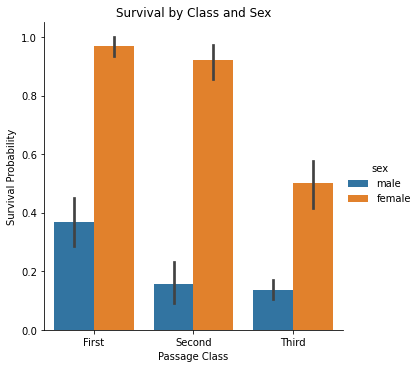

In [14]:
sns.catplot('class', 'survived', data=titanic, kind='bar', hue='sex')
plt.ylabel('Survival Probability')
plt.xlabel('Passage Class')
plt.title('Survival by Class and Sex')
plt.show()

The `plt.show()` call tells Matplotlib to show the plot, and returns nothing, which cleans up the notebook display a bit (otherwise we also see the return value of the last plotting function, which is annoying and usually meaningless).

## Scatter Plots

**If we have:** two numeric variables  
**And we want:** to plot each point in two-dimensional space based on the variable values  
**Then we can:** use a scatter plot.

We saw this in an earlier notebook - let's look at the relationship of Rotten Tomatoes critic and audience scores:

In [15]:
movie_scores = movies[['year', 'rtAllCriticsRating', 'rtAudienceRating']].rename(columns={
    'rtAllCriticsRating': 'Critics',
    'rtAudienceRating': 'Audience'
})
movie_scores

,year,Critics,Audience
id,,,
1,1995,9.0,3.7
2,1995,5.6,3.2
3,1993,5.9,3.2
4,1995,5.6,3.3
5,1995,5.3,3.0
...,...,...,...
65088,2008,4.4,3.5
65091,1934,7.0,3.7
65126,2008,5.6,3.3


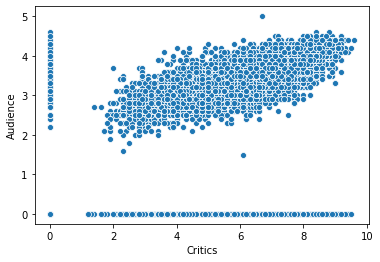

In [16]:
sns.scatterplot('Critics', 'Audience', data=movie_scores)

We can see more things, including distributions in the margin, with the more sophisticated `jointplot`:

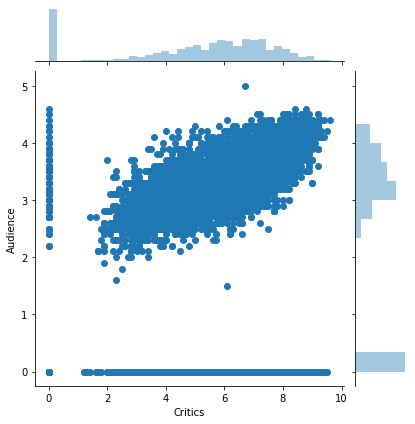

In [17]:
sns.jointplot('Critics', 'Audience', data=movie_scores)

Now the top and right margins show the histograms of the those values!

## Line Chart

**If we have:** two numeric variables, with one that reasonably defines a 'series' that they progress along  
**And we want:** to show how variables change from one value of the 'series' variable to another  
**Then we can:** use a line chart.

We saw this with the average scores by year previously.

In [18]:
year_scores = movie_scores.groupby('year').mean()
ys_tall = year_scores.reset_index().melt(id_vars='year', var_name='Source', value_name='MeanAvgScore')
ys_tall

,year,Source,MeanAvgScore
0,1903,Critics,7.600000
1,1915,Critics,8.000000
2,1916,Critics,7.800000
3,1917,Critics,0.000000
4,1918,Critics,0.000000
...,...,...,...
191,2007,Audience,3.062162
192,2008,Audience,2.853698
193,2009,Audience,3.192308
194,2010,Audience,0.000000


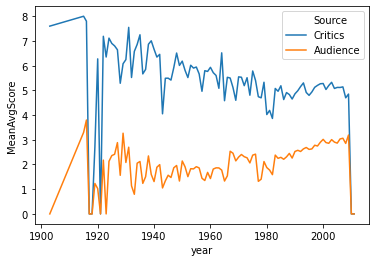

In [19]:
sns.lineplot('year', 'MeanAvgScore', hue='Source', data=ys_tall)

> *Practice: add the mean average rating from MovieLens users to this chart.

## Box Plots

These show *median-based* distribution statistics for a numeric variable grouped by a categorical.

**If we have:** a numeric response variable and a categorical variable  
**And we want:** to visualize median-based distribution statistics (min, max, IQR)  
**Then we can:** use a box plot.

Let's look at the distribution of rating counts by genre.  We first need to join genres and movie stats.

In [20]:
mg_stats = movie_genres.join(movie_stats, on='movieID')
mg_stats

,movieID,genre,RatingCount,MeanRating
0,1,Adventure,1263.0,3.735154
1,1,Animation,1263.0,3.735154
2,1,Children,1263.0,3.735154
3,1,Comedy,1263.0,3.735154
4,1,Fantasy,1263.0,3.735154
...,...,...,...,...
20804,65126,Comedy,2.0,3.250000
20805,65126,Drama,2.0,3.250000
20806,65130,Drama,1.0,2.500000
20807,65130,Romance,1.0,2.500000


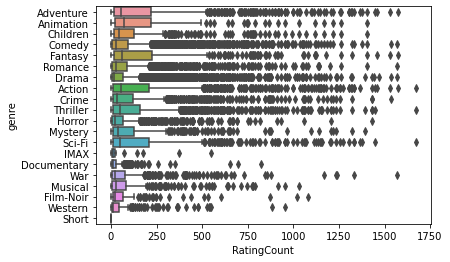

In [21]:
sns.boxplot('RatingCount', 'genre', data=mg_stats)

Note that this is horizontal rather than vertical - Seaborn automatically figures out which is numeric and which is categorical, and orients the box plot correctly.  Horizontal is easier to have good layouts for the *y* axis labels.

### Violin Plots

The *violin* plot also shows distributions, but does so with a *kernel density estimate*:

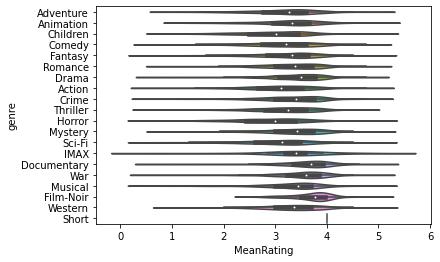

In [22]:
sns.violinplot('MeanRating', 'genre', data=mg_stats)

**This chart is too crowded to usefully read**.

## Wrapping Up

The Seaborn functions have a common interface:

- `x` and `y` as first and second parameters, respectively
- if `data=` points to a data frame, then `x` and `y` are interpreted as column names
- can change other *aesthetics*, such as color-coding points with `hue='column'`

We'll see more plot capabilities later.